In [1]:
import sys
sys.path.append("../../")

In [2]:
import random
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1 import make_axes_locatable
from botorch.utils.sampling import draw_sobol_samples
from botorch.utils.multi_objective.pareto import is_non_dominated
from botorch.test_functions.multi_objective import GMM, BraninCurrin
from botorch.utils.multi_objective.box_decompositions.dominated import DominatedPartitioning
from botorch.utils.multi_objective.box_decompositions.non_dominated import FastNondominatedPartitioning


tkwargs = {
    "dtype": torch.double,
    "device": torch.device("cpu"),
}
SEED = 42
# Setting seed for reproducibility
random.seed(SEED)
torch.manual_seed(SEED)
np.random.seed(SEED)

In [3]:
# define problem
# problem = BraninCurrin(negate=True).to(**tkwargs)
problem = GMM(negate=True).to(**tkwargs)
problem.ref_point = torch.tensor([0., 0.], **tkwargs)

## Problem

The approximated pareto set and pareto front is shown in the following figure.

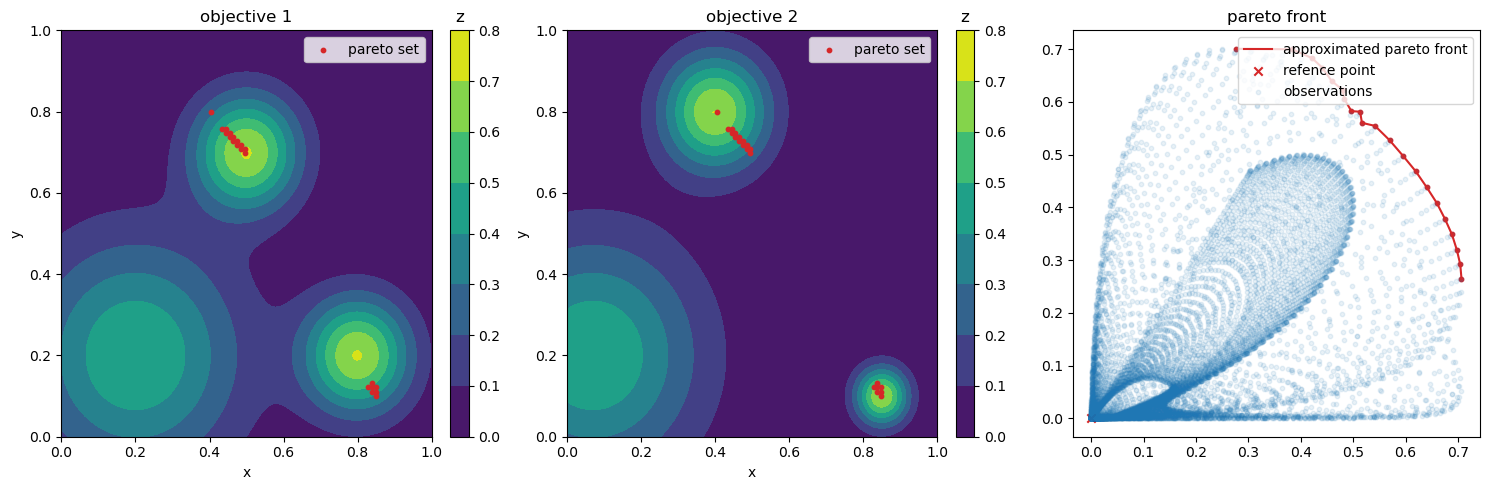

In [4]:
from plot_utils import plot_objective

plot_objective(problem, num_samples=100)

In [5]:
def generate_initial_data(problem, n=6):
    # generate training data
    train_x = draw_sobol_samples(bounds=problem.bounds, n=n, q=1).squeeze(1)
    train_obj = problem(train_x)
    return train_x, train_obj

In [6]:
init_x, init_y = generate_initial_data(problem, n=6)

## Generate data

In [7]:
from optimizers.mbore.mbore import MBORE

In [8]:
def plot_input_space(xx, yy, x_obs, preds, fig, ax, title=None):
    div = make_axes_locatable(ax)
    cax = div.append_axes('right', '5%', '5%')

    # plot functions
    countourset = ax.contourf(
        xx,
        yy,
        preds.reshape(xx.shape),
    )
    ax.scatter(*x_obs.t(), alpha=0.3, s=10, color='tab:red')

    cax.grid(False)  # just to remove the warning
    clb = fig.colorbar(countourset, cax=cax)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title(title)
    clb.ax.set_title('z')


def plot_pareto_space(y_obs, pareto, l, u_nbd, ax, title='pareto'):
    ax.scatter(*y_obs[~pareto].t(), s=10, alpha=0.3)
    ax.scatter(*l.t(), s=10, color='tab:red', label="pareto")
    ax.plot(*l.t(), color='tab:red')
    # ax.scatter(*u_nbd.t(), s=10, label="non dominated", color='tab:purple')
    ax.scatter(*problem.ref_point.t(), s=10, color='k', label="ref point")

    ax.set_xlabel('y1')
    ax.set_ylabel('y2')
    ax.set_title(title)
    ax.legend()


def plot_pareto_box(tau, boxes, ax):
    ax.scatter(*tau.t(), label=r"$\mathbf{\tau}$")
    pc = PatchCollection(boxes, cmap='tab10', alpha=.3)
    pc.set_array(torch.arange(0, len(boxes)))
    ax.add_collection(pc)
    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()
    ax.axvspan(x_lim[0], tau[0], alpha=0.1, color='tab:gray')
    ax.axhspan(y_lim[0], tau[1], alpha=0.1, color='tab:gray')
    ax.set_xlim(*x_lim)
    ax.set_ylim(*y_lim)

In [9]:
x_obs = init_x
y_obs = init_y

num_obj = problem.num_objectives
# only plot the first two dimensions
xx, yy = np.meshgrid(
    np.linspace(
        *problem.bounds.t()[0], 100
    ),
    np.linspace(
        *problem.bounds.t()[1], 100
    ),
)
x_cands = np.vstack((xx.flatten(), yy.flatten())).T
x_cands = torch.from_numpy(x_cands).to(**tkwargs)
y_cands = problem(x_cands).reshape(100, 100, num_obj)
xx_obj, yy_obj = y_cands[:, :, 0], y_cands[:, :, 1]

2024-05-07 10:03:45,548 | MBORE
2024-05-07 10:03:45,560 | Model fitting takes 0.01s
2024-05-07 10:03:45,560 | Optimizing the acquisition function takes 0.00s


Iteration 0


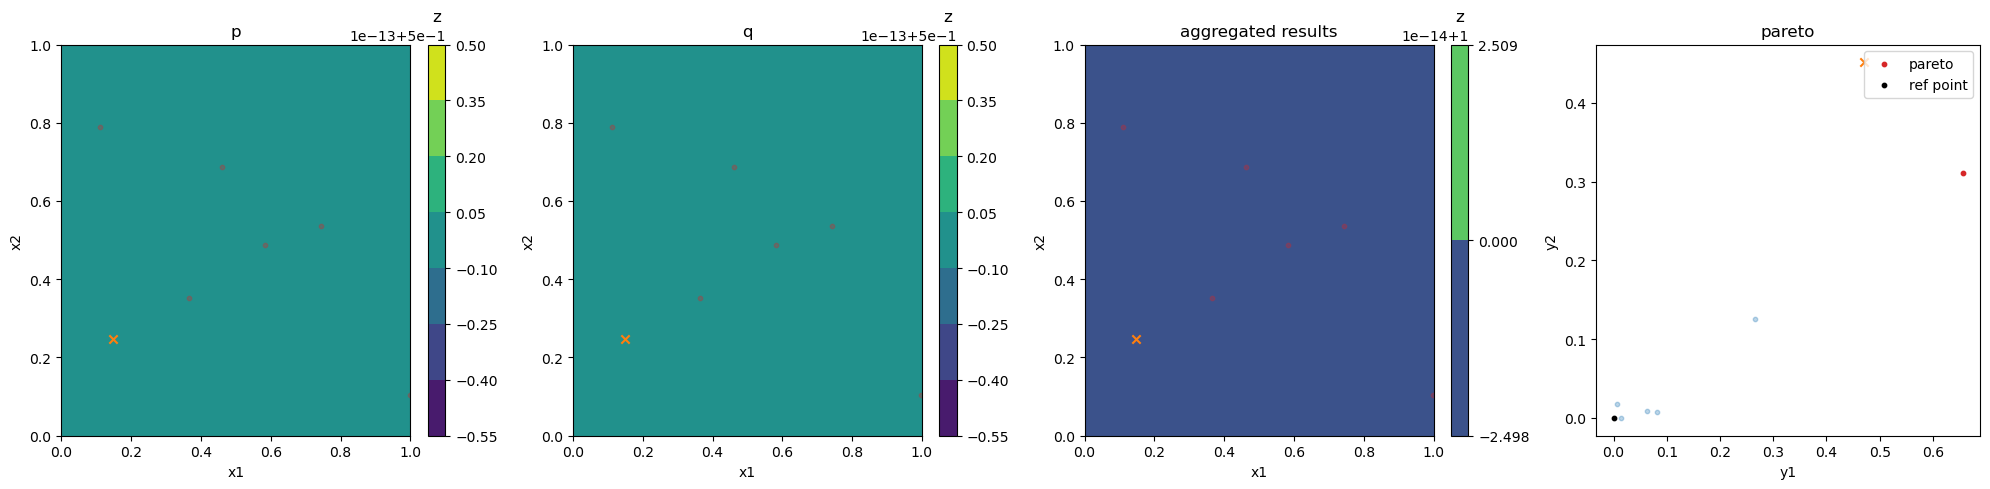

2024-05-07 10:03:46,341 | Model fitting takes 0.01s
2024-05-07 10:03:46,342 | Optimizing the acquisition function takes 0.00s


Iteration 1


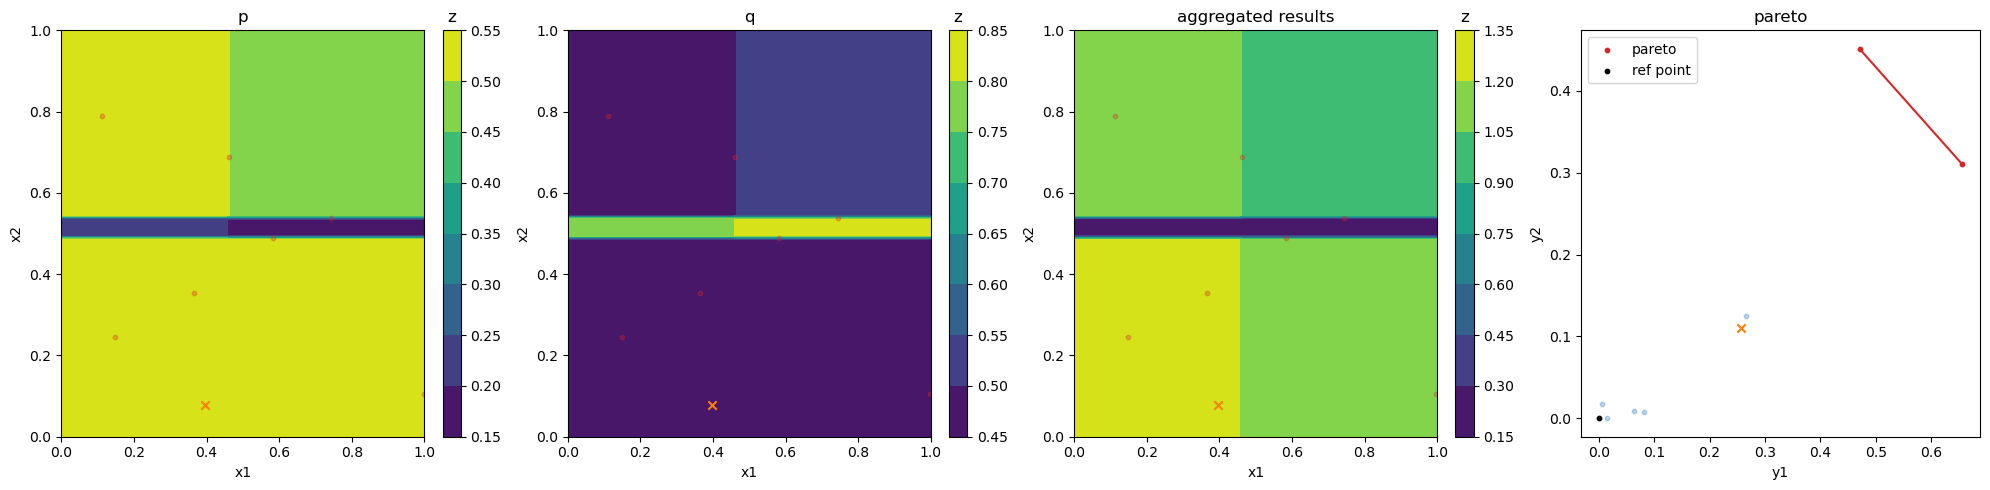

2024-05-07 10:03:47,031 | Model fitting takes 0.01s
2024-05-07 10:03:47,031 | Optimizing the acquisition function takes 0.00s


Iteration 2


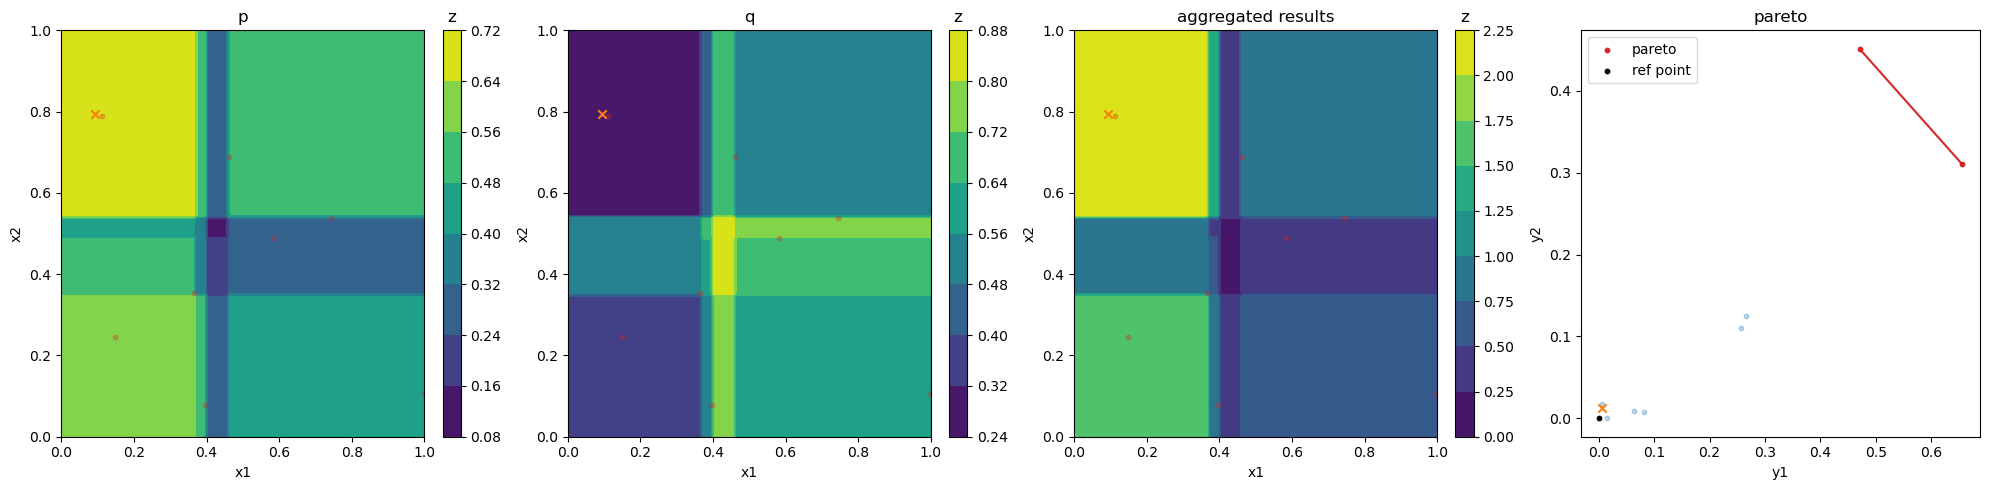

2024-05-07 10:03:47,719 | Model fitting takes 0.01s
2024-05-07 10:03:47,720 | Optimizing the acquisition function takes 0.00s


Iteration 3


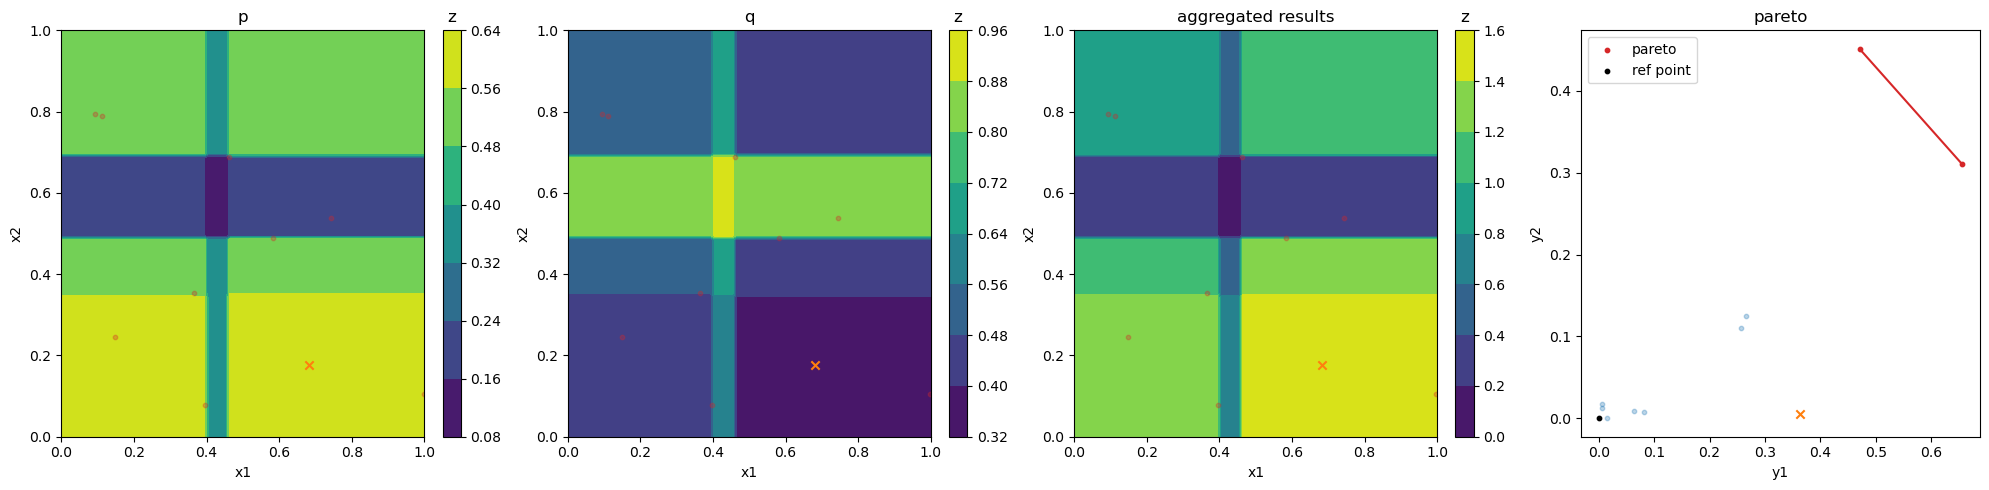

2024-05-07 10:03:48,398 | Model fitting takes 0.01s
2024-05-07 10:03:48,398 | Optimizing the acquisition function takes 0.00s


Iteration 4


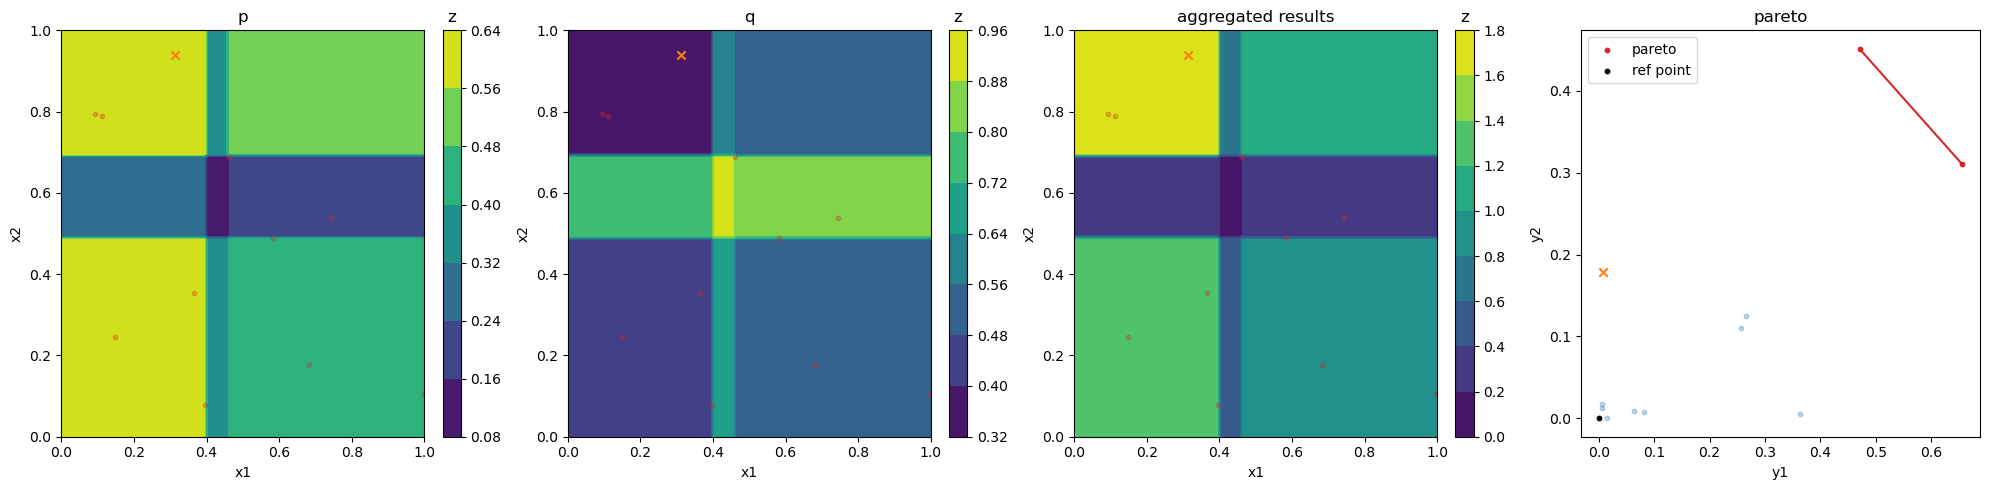

2024-05-07 10:03:49,089 | Model fitting takes 0.01s
2024-05-07 10:03:49,089 | Optimizing the acquisition function takes 0.00s


Iteration 5


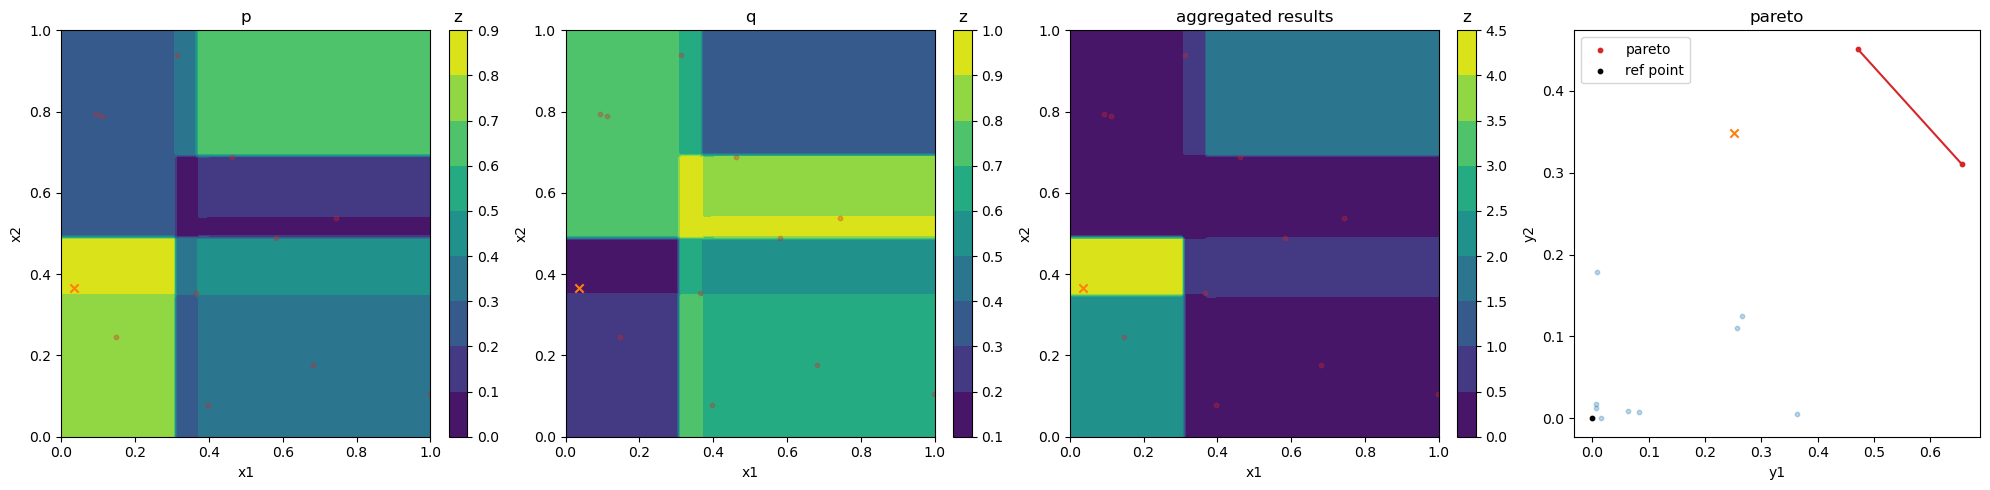

2024-05-07 10:03:49,792 | Model fitting takes 0.01s
2024-05-07 10:03:49,792 | Optimizing the acquisition function takes 0.00s


Iteration 6


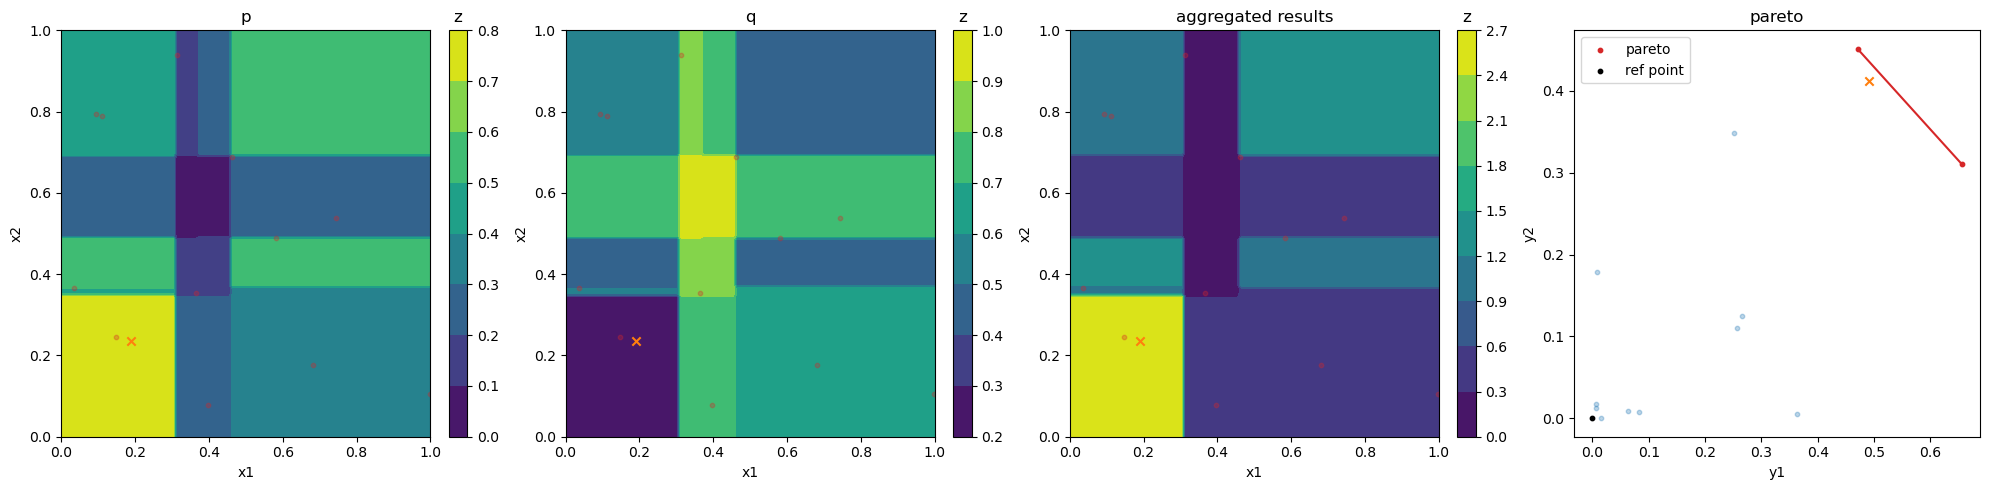

2024-05-07 10:03:50,707 | Model fitting takes 0.01s
2024-05-07 10:03:50,708 | Optimizing the acquisition function takes 0.00s


Iteration 7


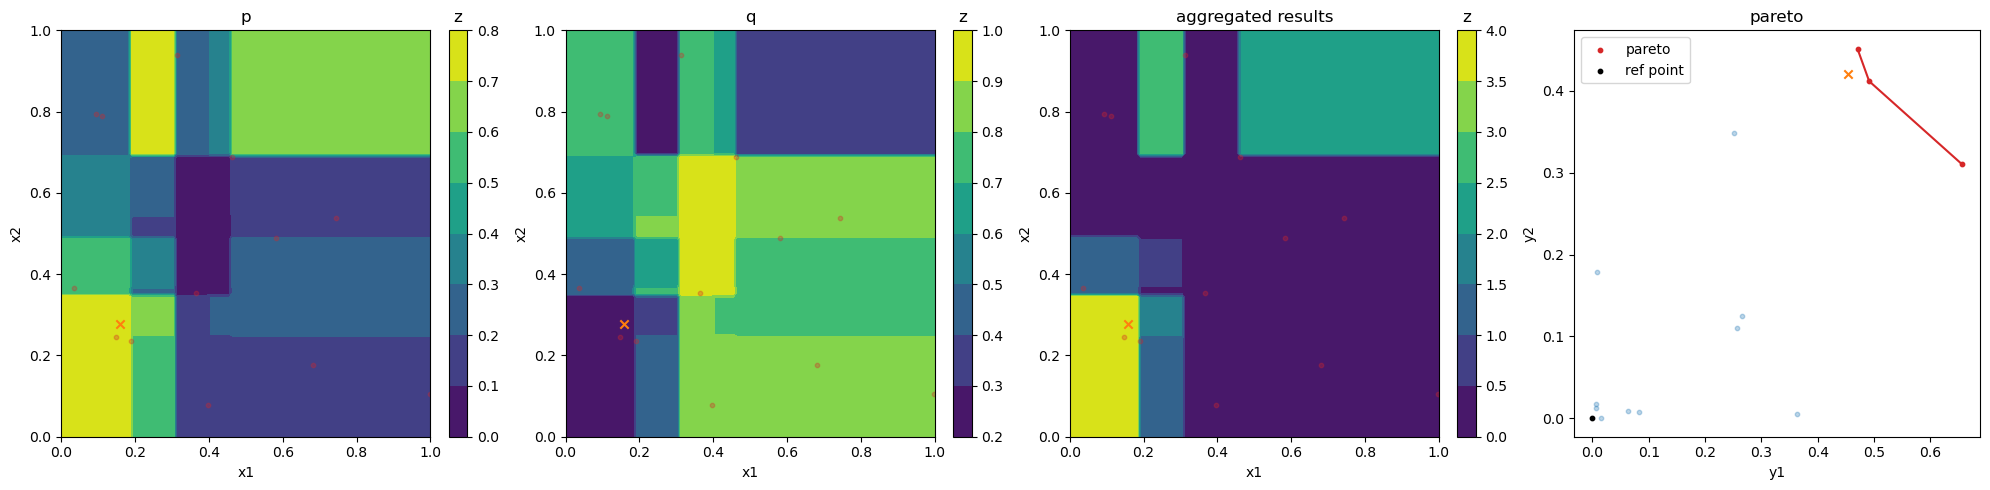

2024-05-07 10:03:51,393 | Model fitting takes 0.01s
2024-05-07 10:03:51,393 | Optimizing the acquisition function takes 0.00s


Iteration 8


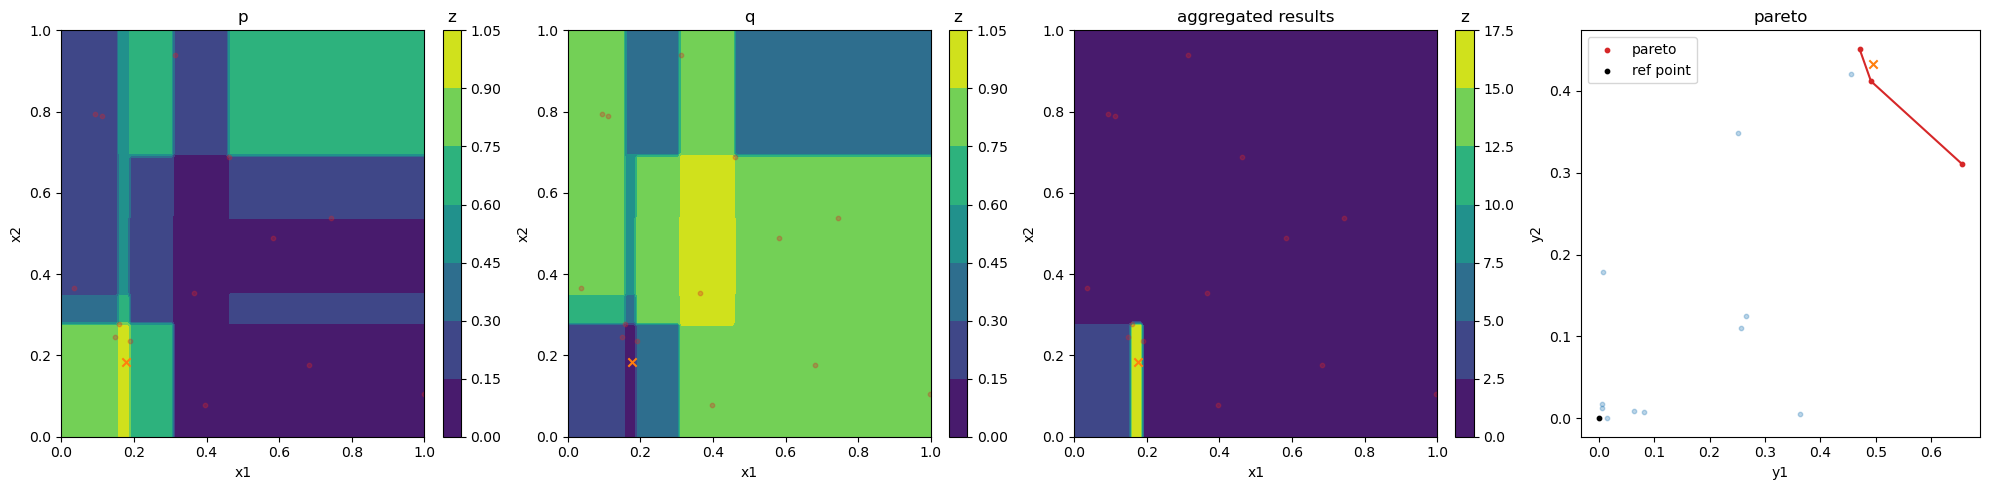

2024-05-07 10:03:52,061 | Model fitting takes 0.01s
2024-05-07 10:03:52,062 | Optimizing the acquisition function takes 0.00s


Iteration 9


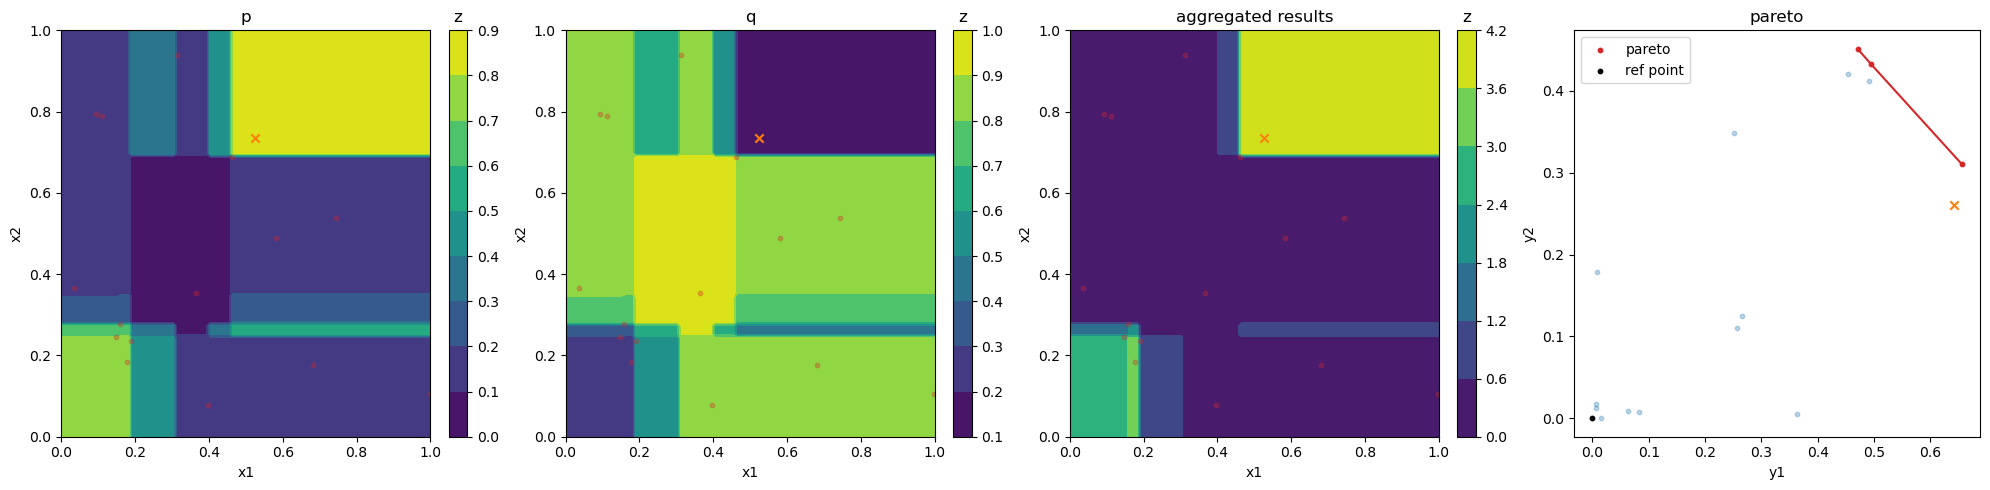

2024-05-07 10:03:52,752 | Model fitting takes 0.01s
2024-05-07 10:03:52,753 | Optimizing the acquisition function takes 0.00s


Iteration 10


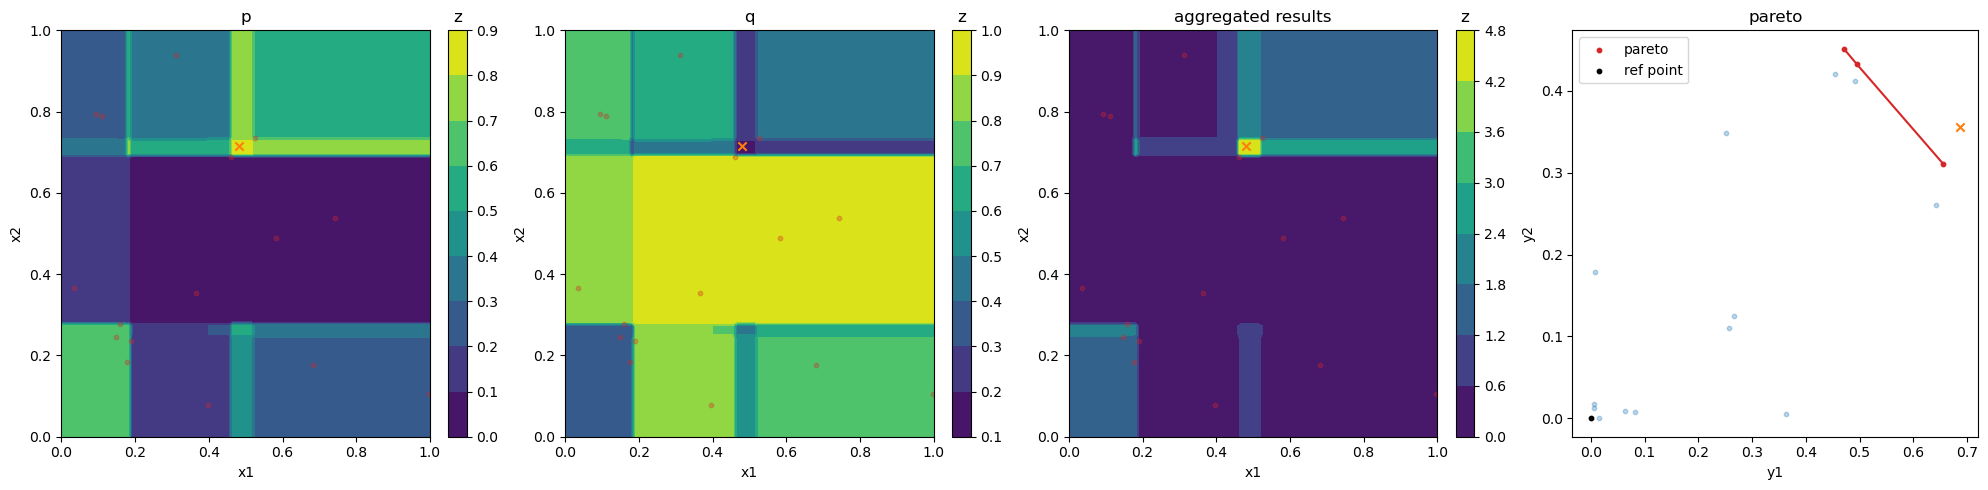

2024-05-07 10:03:53,452 | Model fitting takes 0.01s
2024-05-07 10:03:53,453 | Optimizing the acquisition function takes 0.00s


Iteration 11


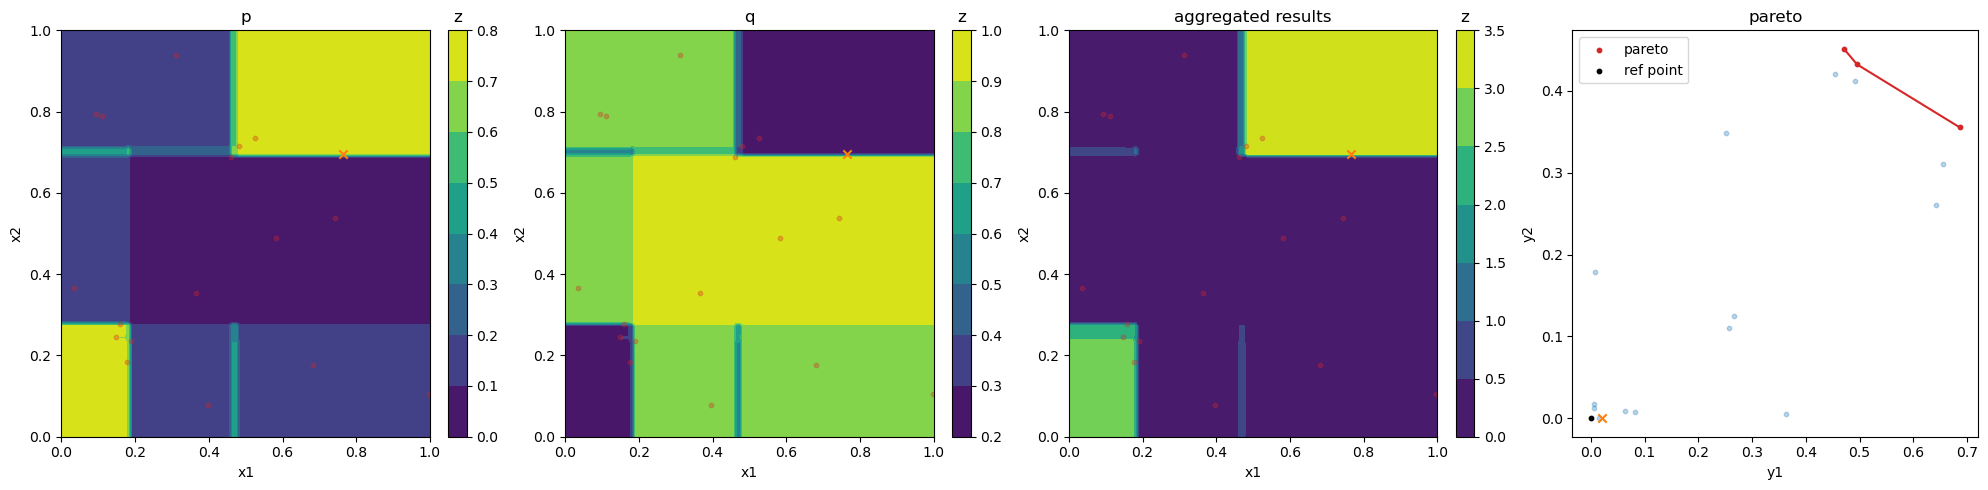

2024-05-07 10:03:54,349 | Model fitting takes 0.01s
2024-05-07 10:03:54,350 | Optimizing the acquisition function takes 0.00s


Iteration 12


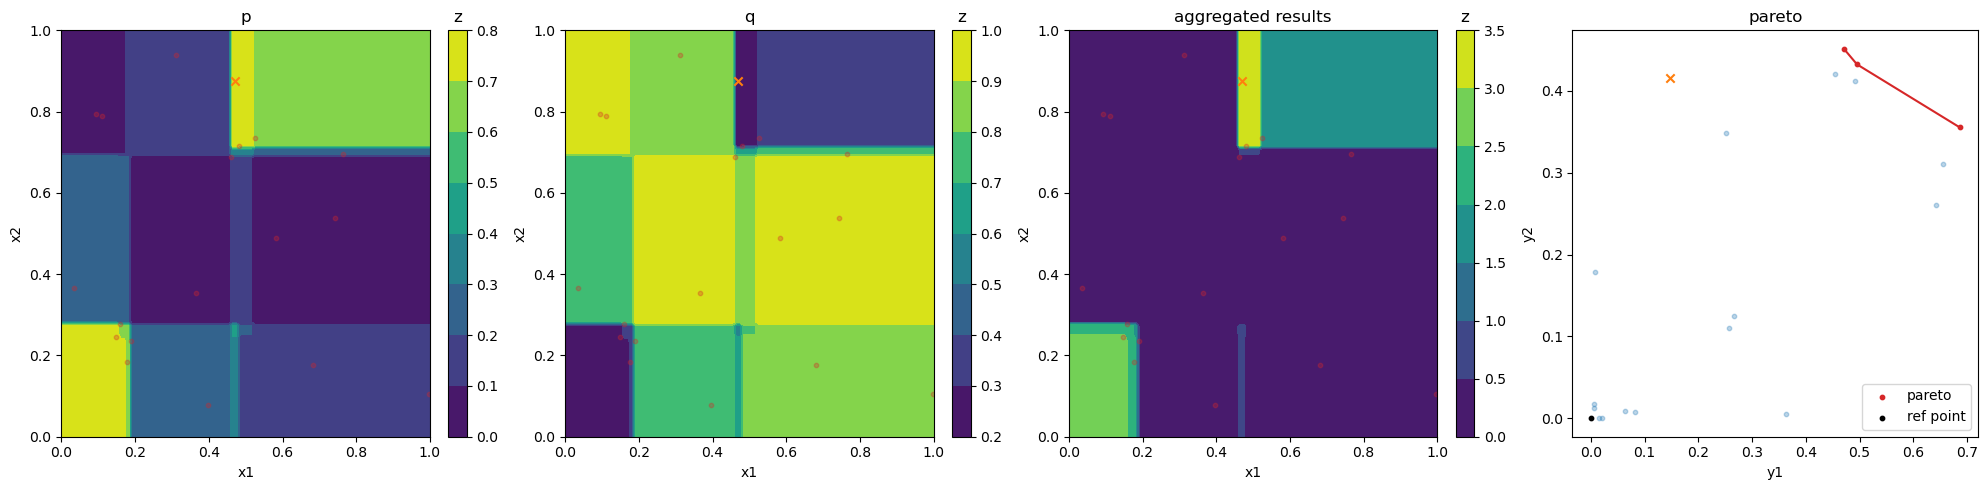

2024-05-07 10:03:55,037 | Model fitting takes 0.01s
2024-05-07 10:03:55,038 | Optimizing the acquisition function takes 0.00s


Iteration 13


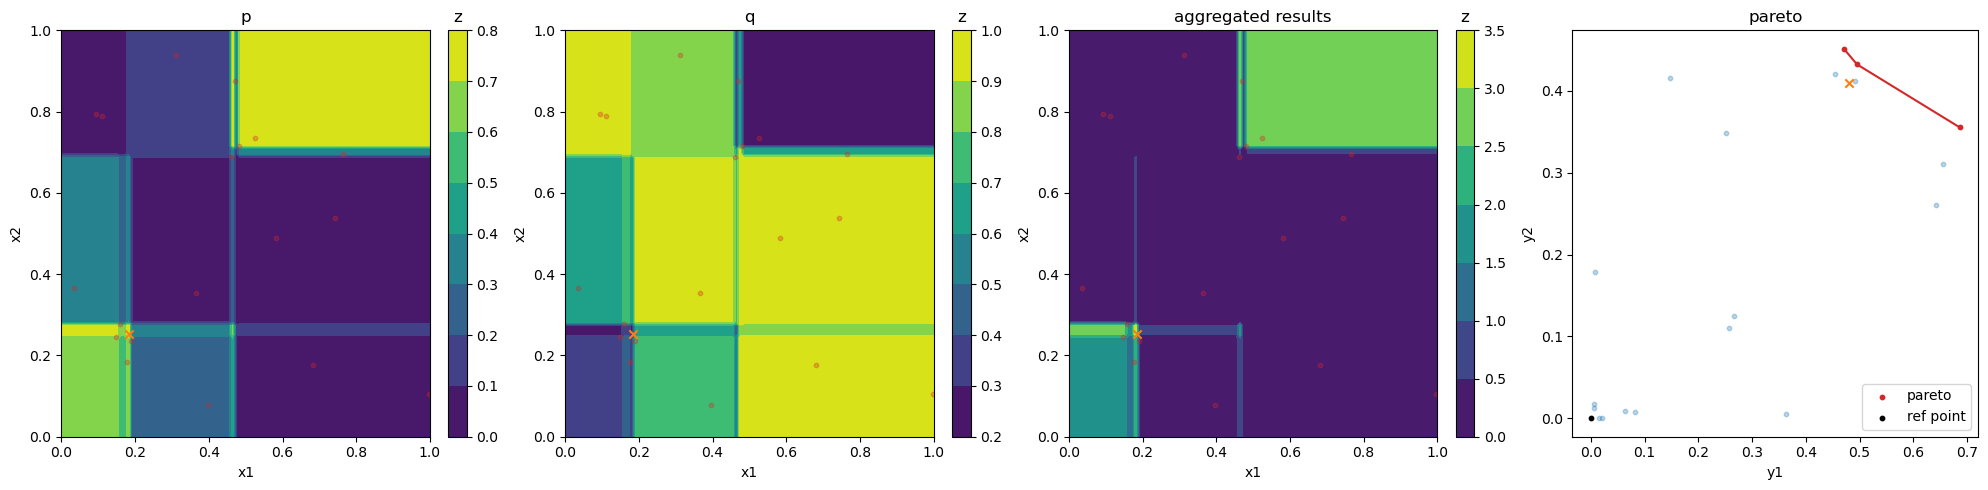

2024-05-07 10:03:55,723 | Model fitting takes 0.01s
2024-05-07 10:03:55,723 | Optimizing the acquisition function takes 0.00s


Iteration 14


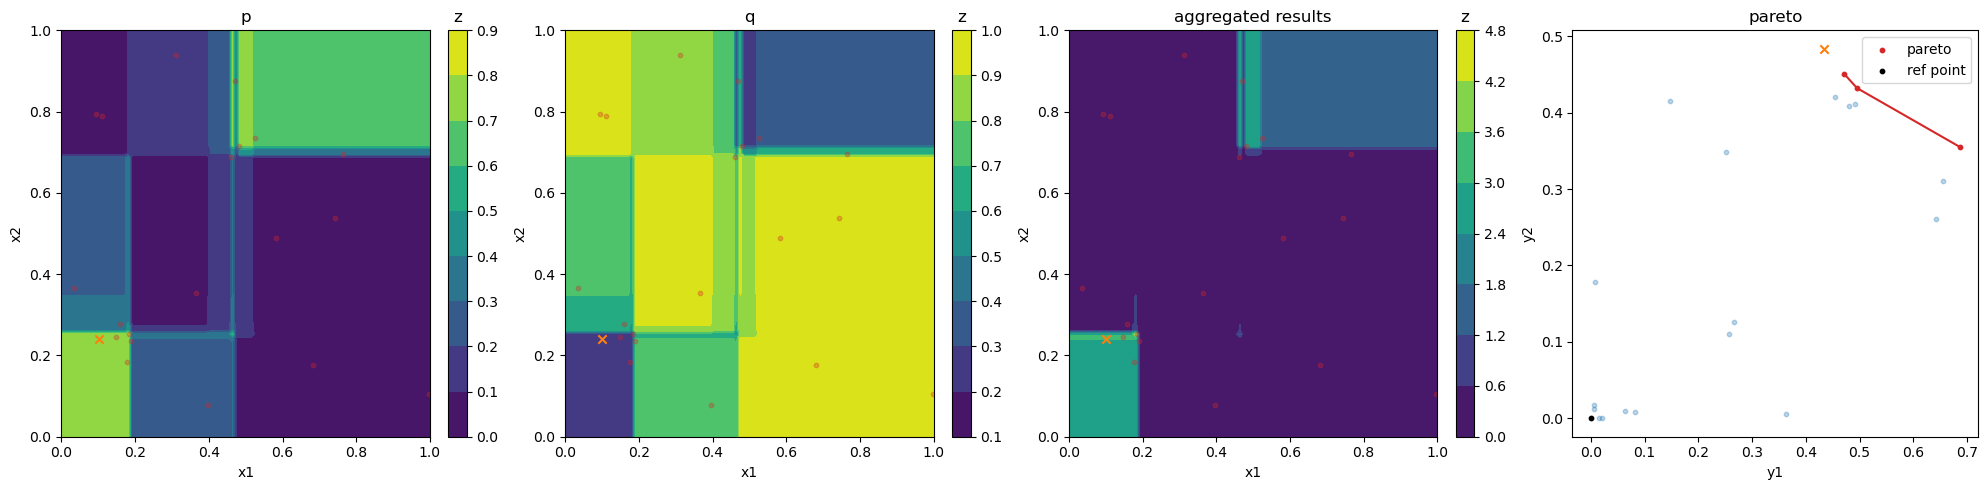

2024-05-07 10:03:56,421 | Model fitting takes 0.01s
2024-05-07 10:03:56,422 | Optimizing the acquisition function takes 0.00s


Iteration 15


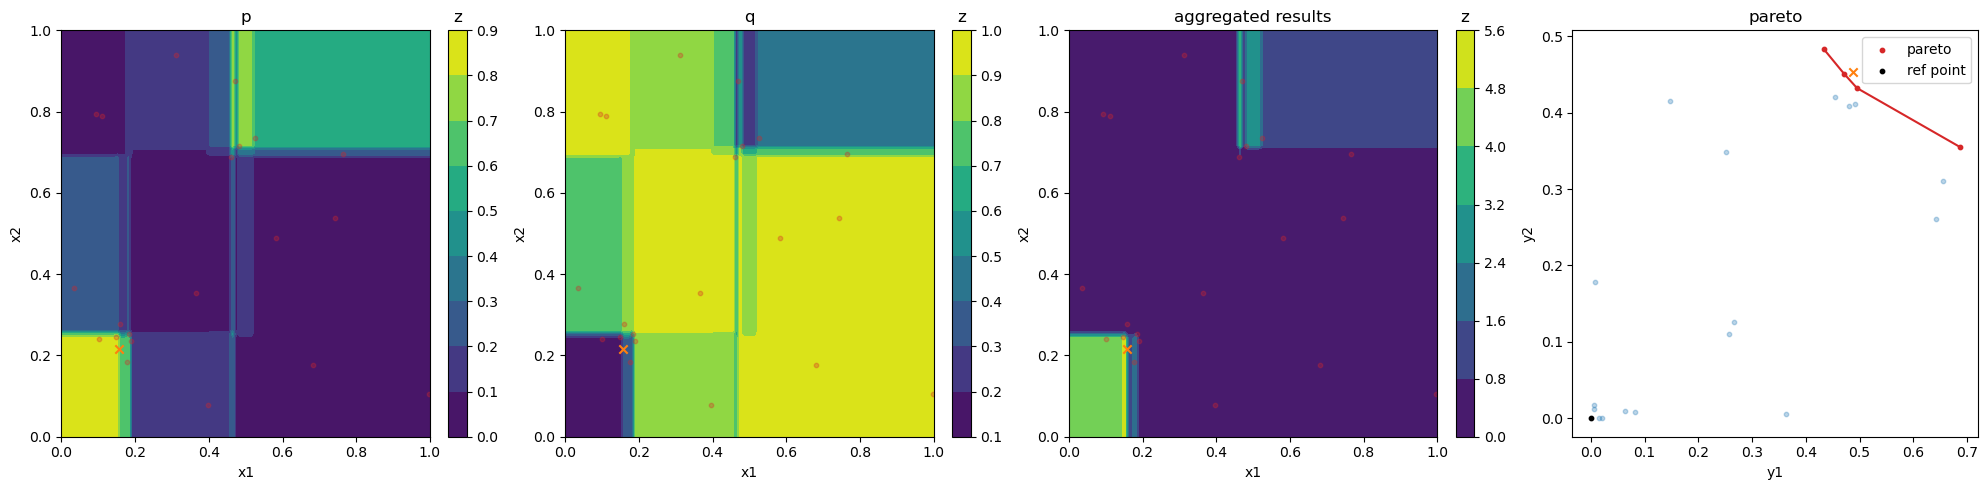

2024-05-07 10:03:57,115 | Model fitting takes 0.01s
2024-05-07 10:03:57,116 | Optimizing the acquisition function takes 0.00s


Iteration 16


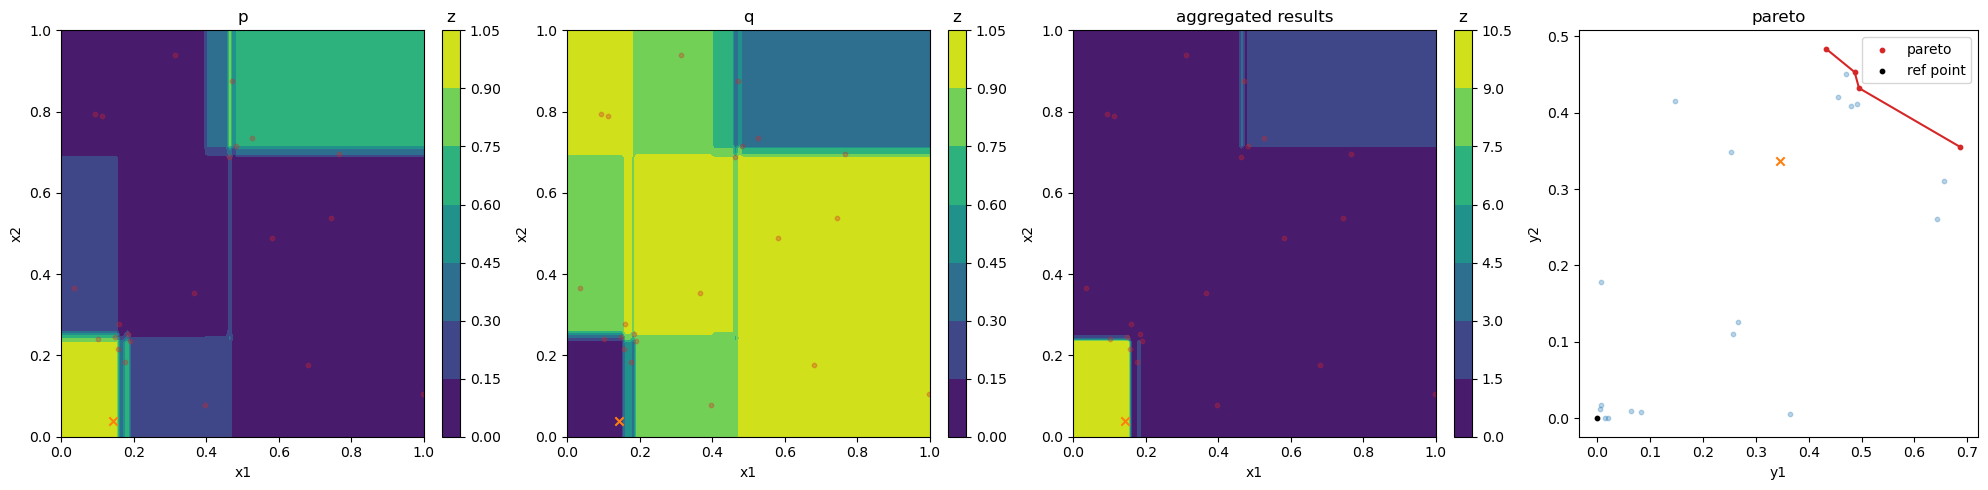

2024-05-07 10:03:57,793 | Model fitting takes 0.01s
2024-05-07 10:03:57,794 | Optimizing the acquisition function takes 0.00s


Iteration 17


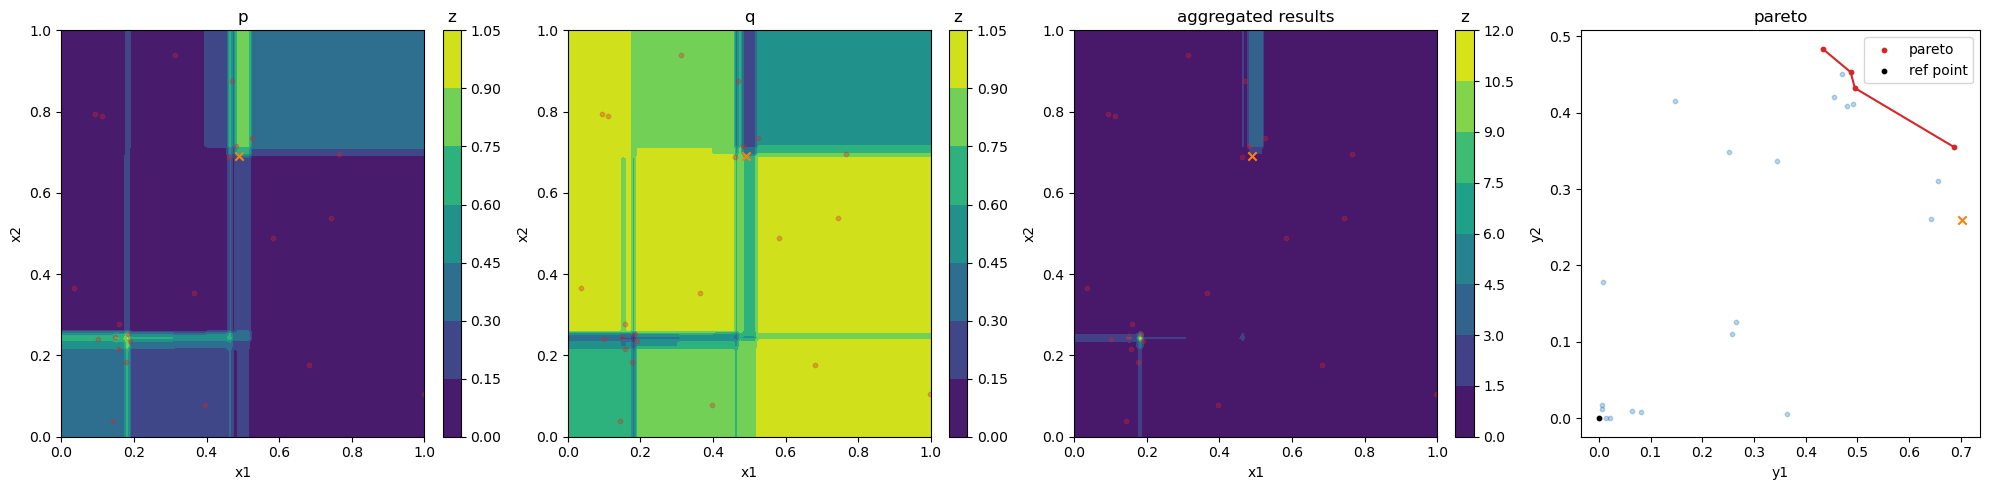

2024-05-07 10:03:58,705 | Model fitting takes 0.01s
2024-05-07 10:03:58,705 | Optimizing the acquisition function takes 0.00s


Iteration 18


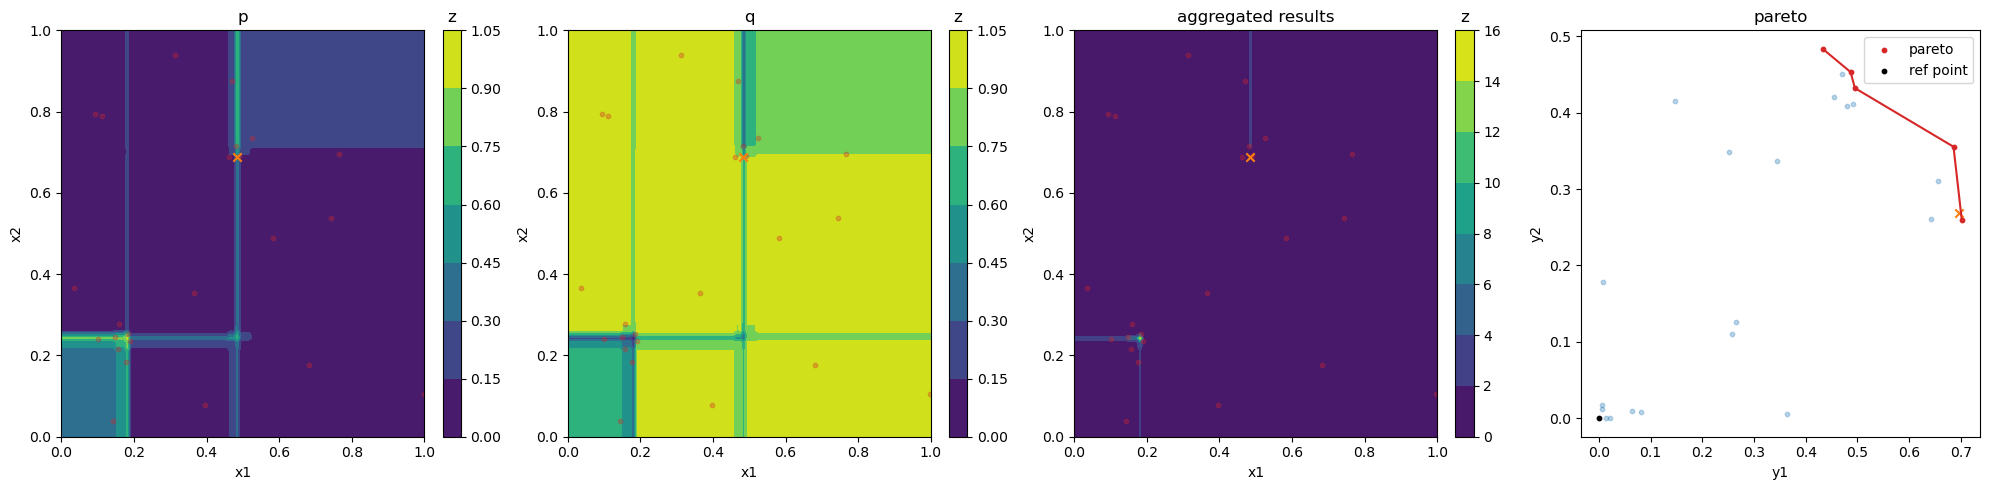

2024-05-07 10:03:59,388 | Model fitting takes 0.01s
2024-05-07 10:03:59,388 | Optimizing the acquisition function takes 0.00s


Iteration 19


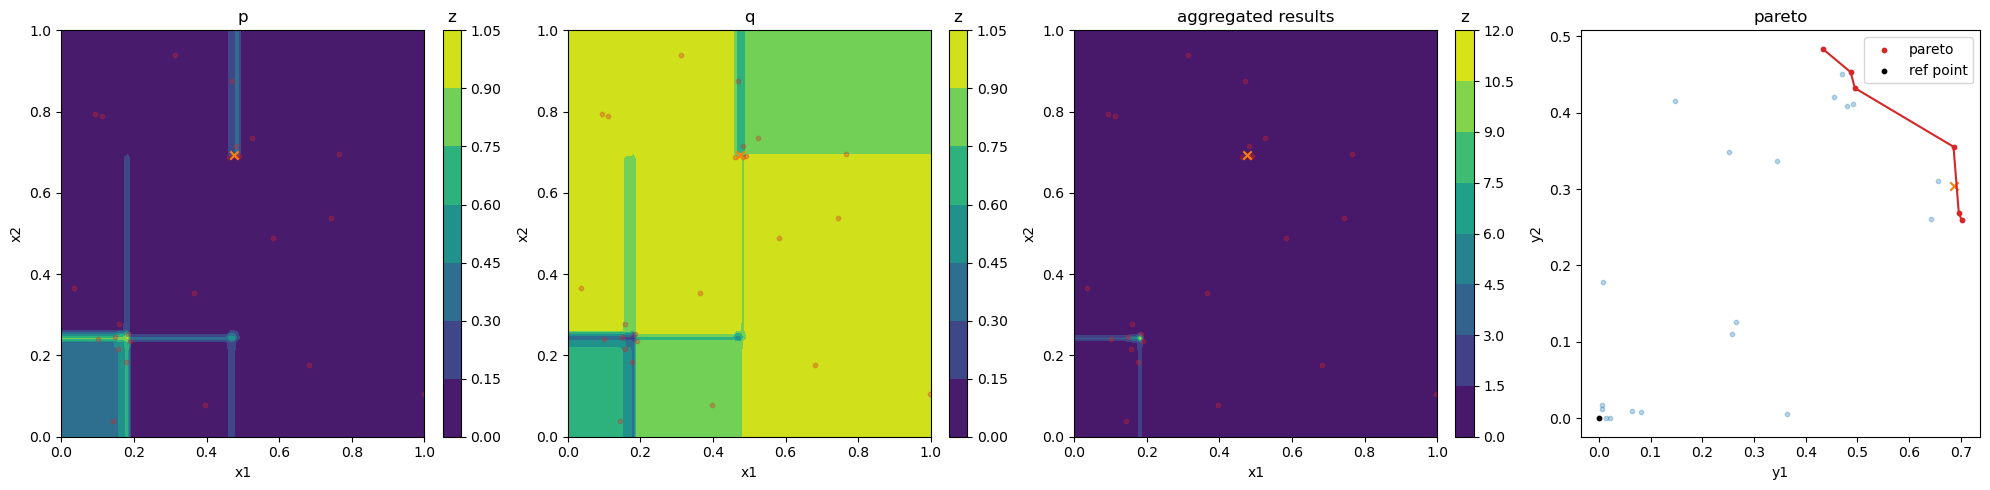

2024-05-07 10:04:00,076 | Model fitting takes 0.01s
2024-05-07 10:04:00,078 | Optimizing the acquisition function takes 0.00s


Iteration 20


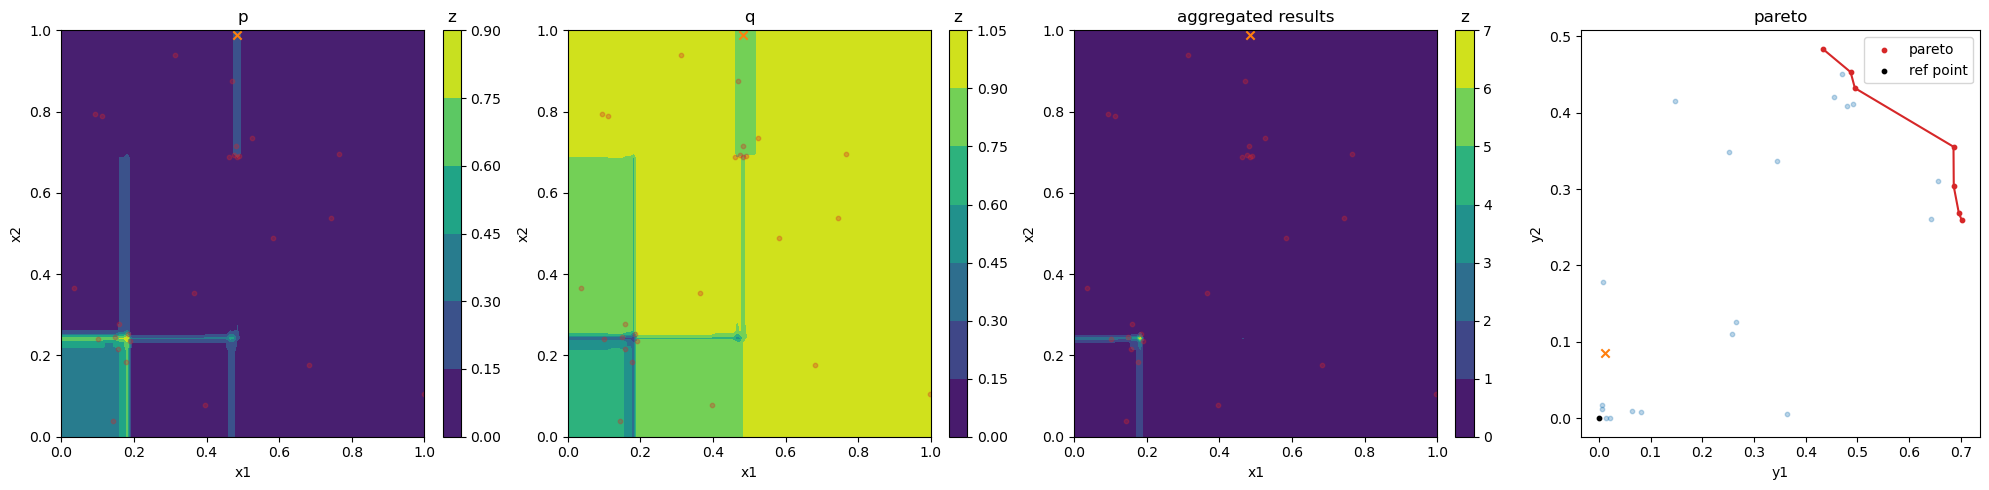

2024-05-07 10:04:00,750 | Model fitting takes 0.01s
2024-05-07 10:04:00,750 | Optimizing the acquisition function takes 0.00s


Iteration 21


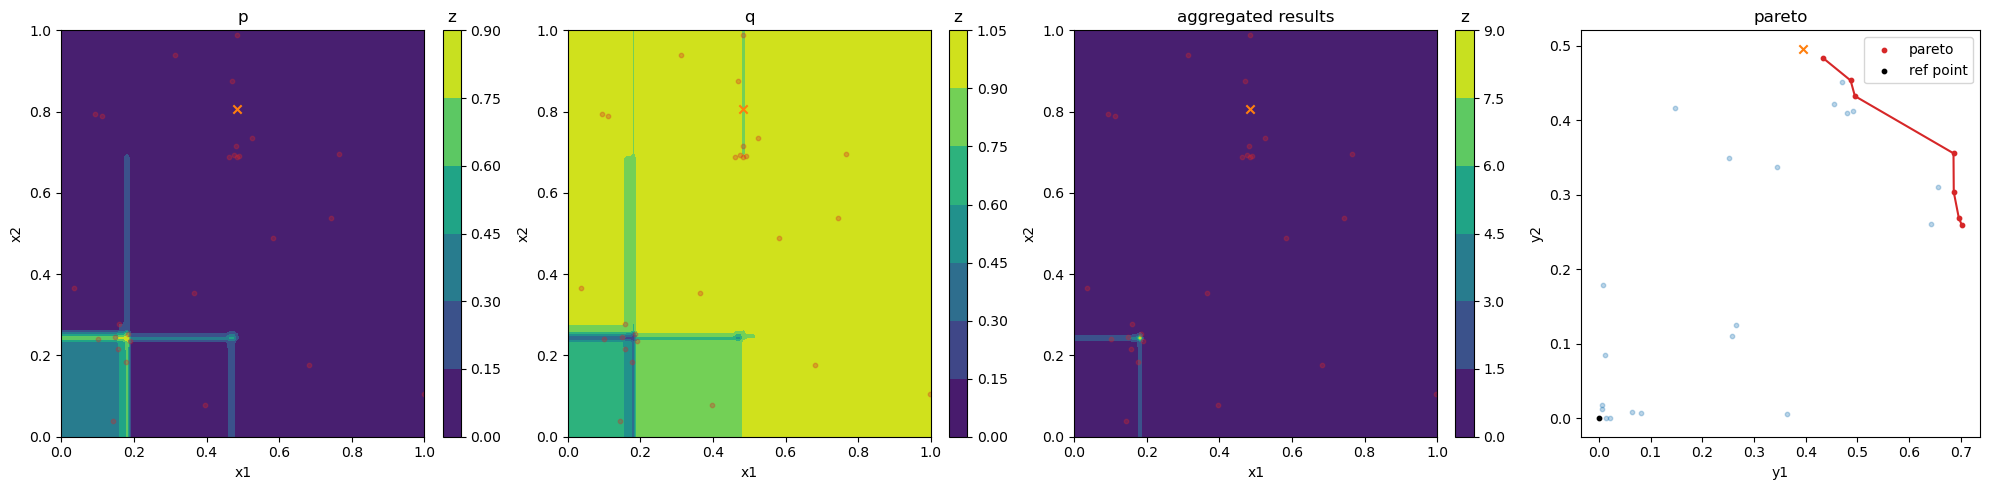

2024-05-07 10:04:01,414 | Model fitting takes 0.01s
2024-05-07 10:04:01,414 | Optimizing the acquisition function takes 0.00s


Iteration 22


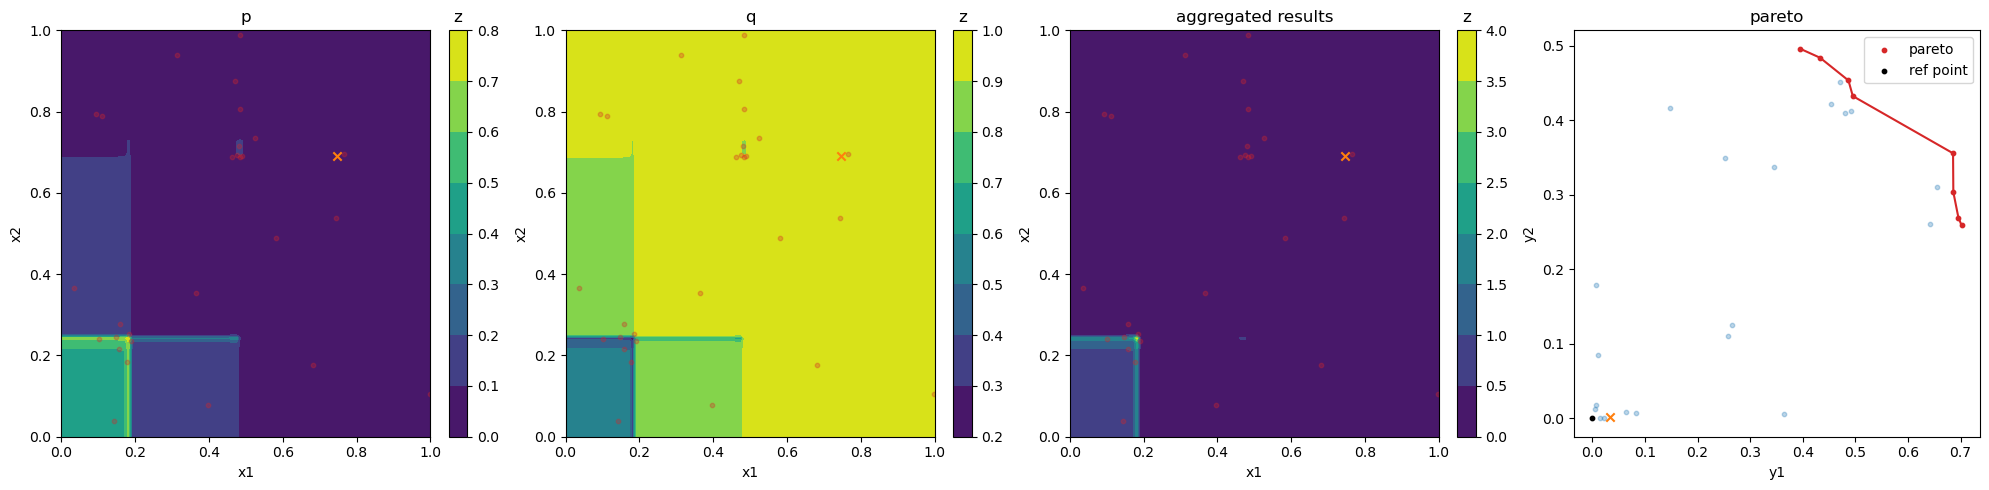

2024-05-07 10:04:02,103 | Model fitting takes 0.01s
2024-05-07 10:04:02,104 | Optimizing the acquisition function takes 0.00s


Iteration 23


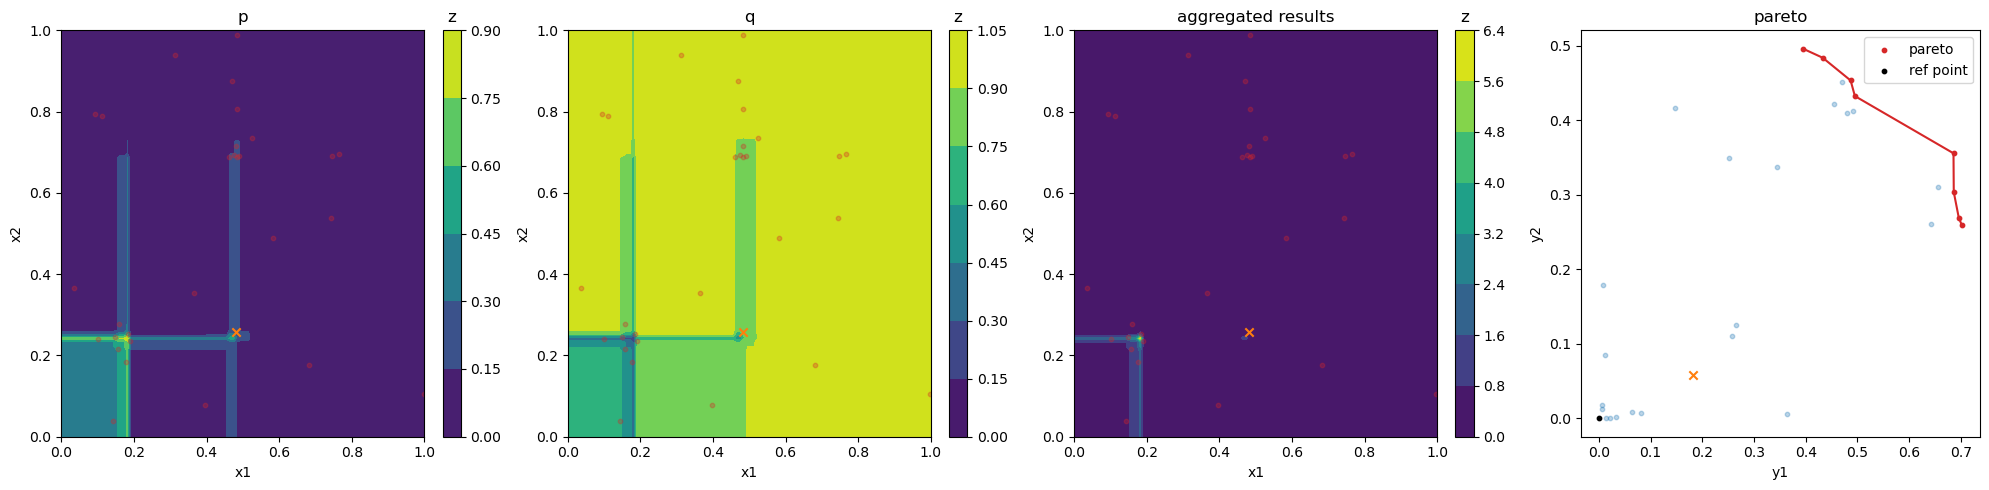

2024-05-07 10:04:03,003 | Model fitting takes 0.01s
2024-05-07 10:04:03,004 | Optimizing the acquisition function takes 0.00s


Iteration 24


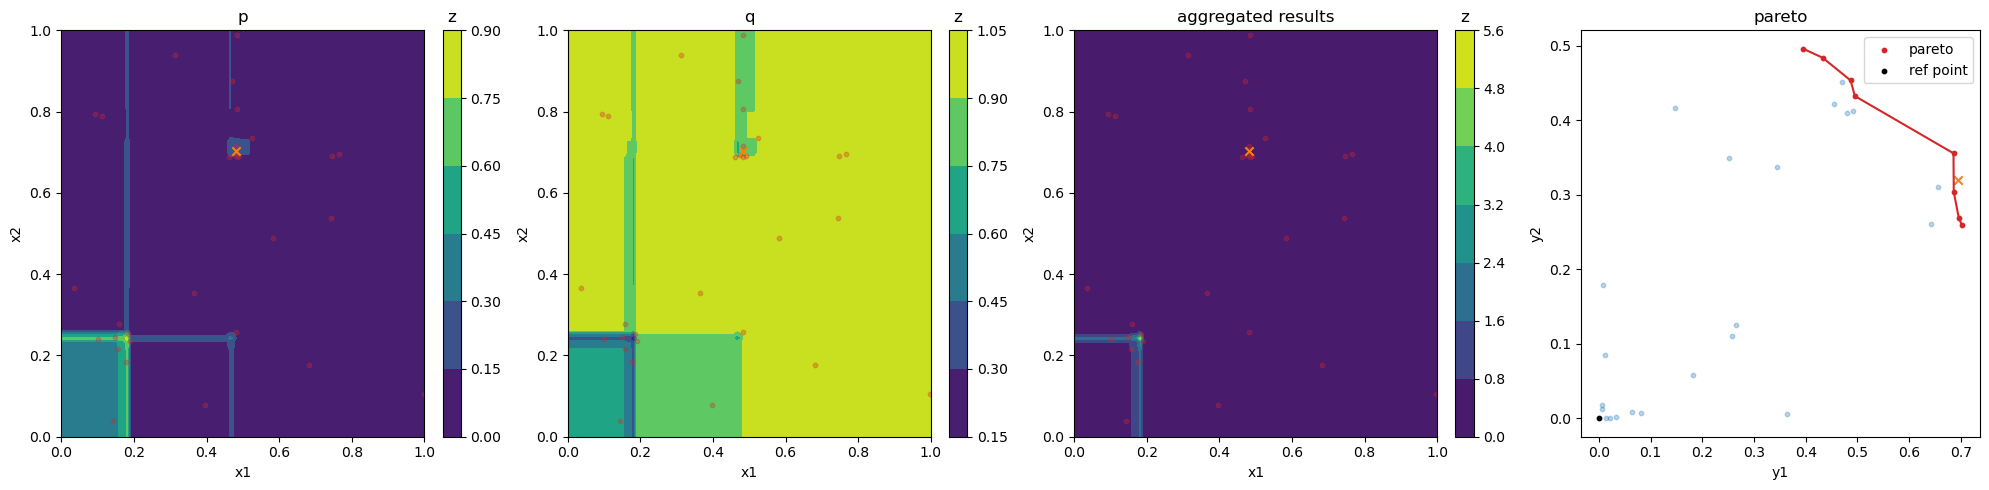

2024-05-07 10:04:03,677 | Model fitting takes 0.01s
2024-05-07 10:04:03,678 | Optimizing the acquisition function takes 0.00s


Iteration 25


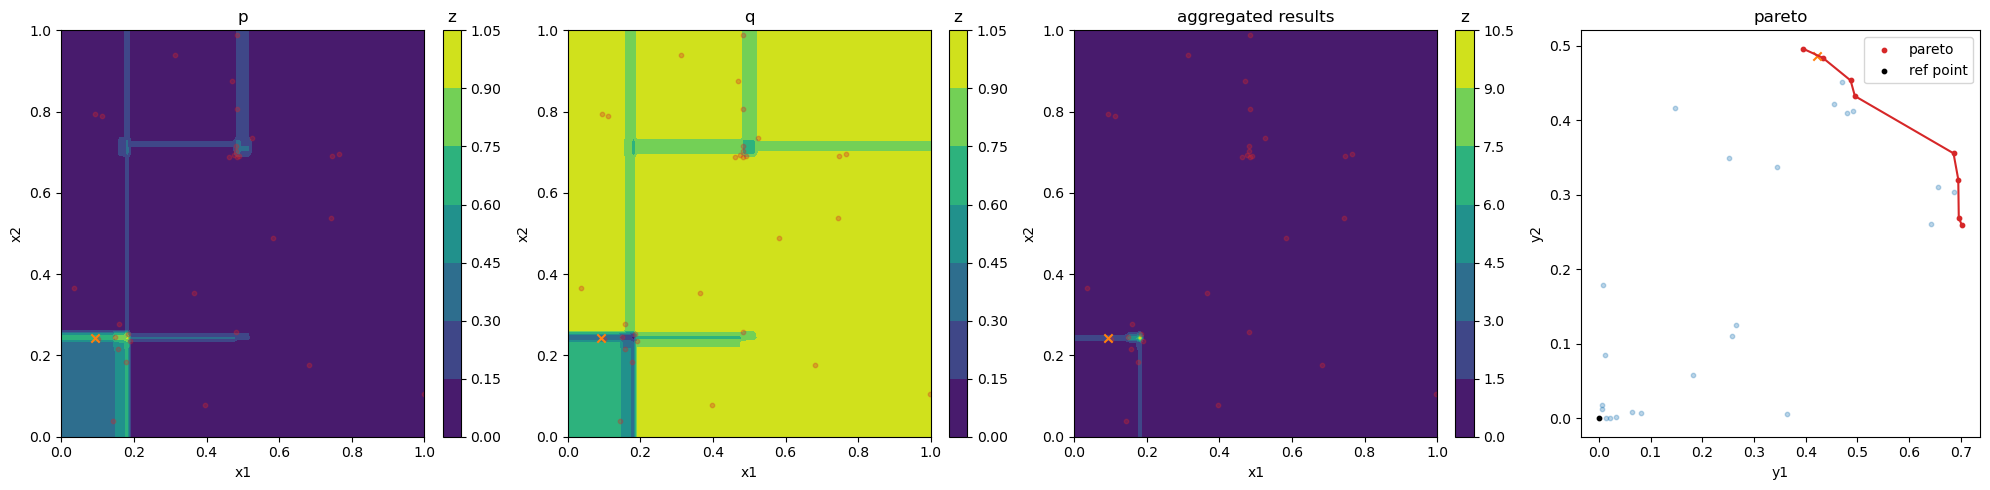

2024-05-07 10:04:04,358 | Model fitting takes 0.01s
2024-05-07 10:04:04,358 | Optimizing the acquisition function takes 0.00s


Iteration 26


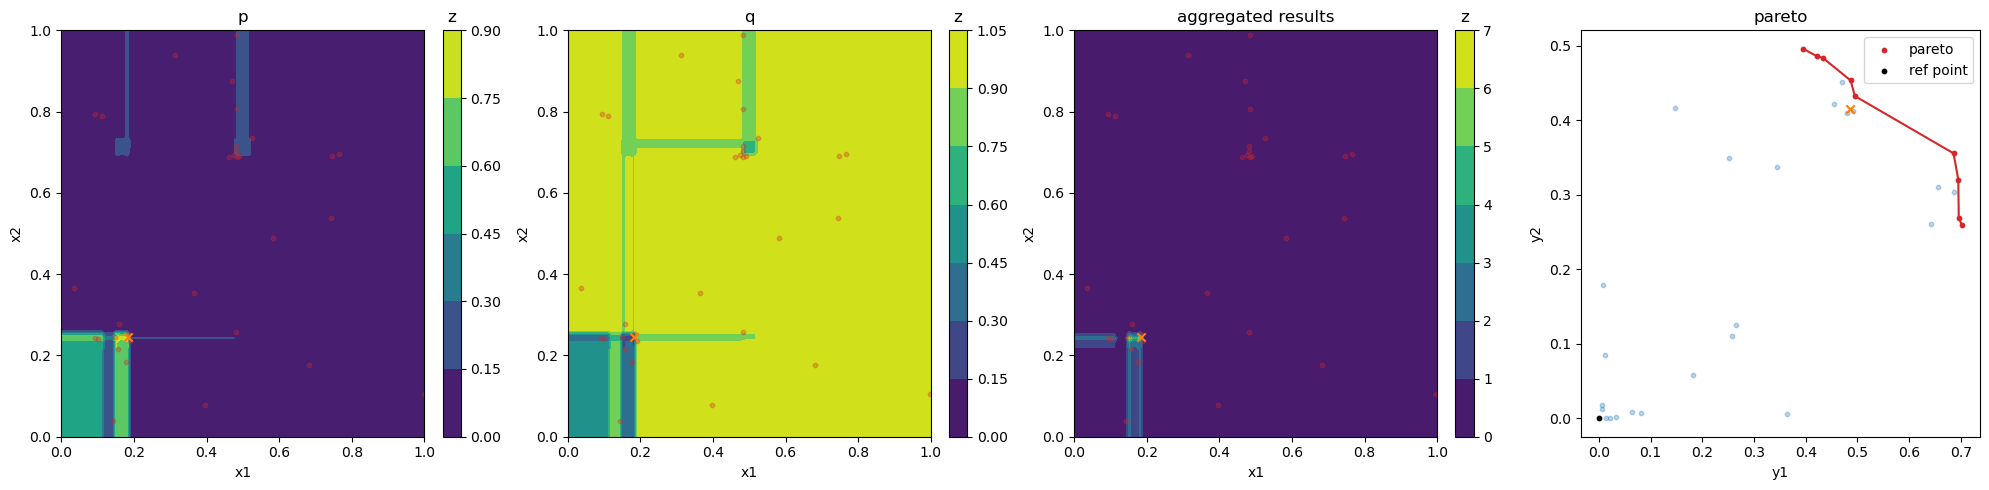

2024-05-07 10:04:05,031 | Model fitting takes 0.01s
2024-05-07 10:04:05,032 | Optimizing the acquisition function takes 0.00s


Iteration 27


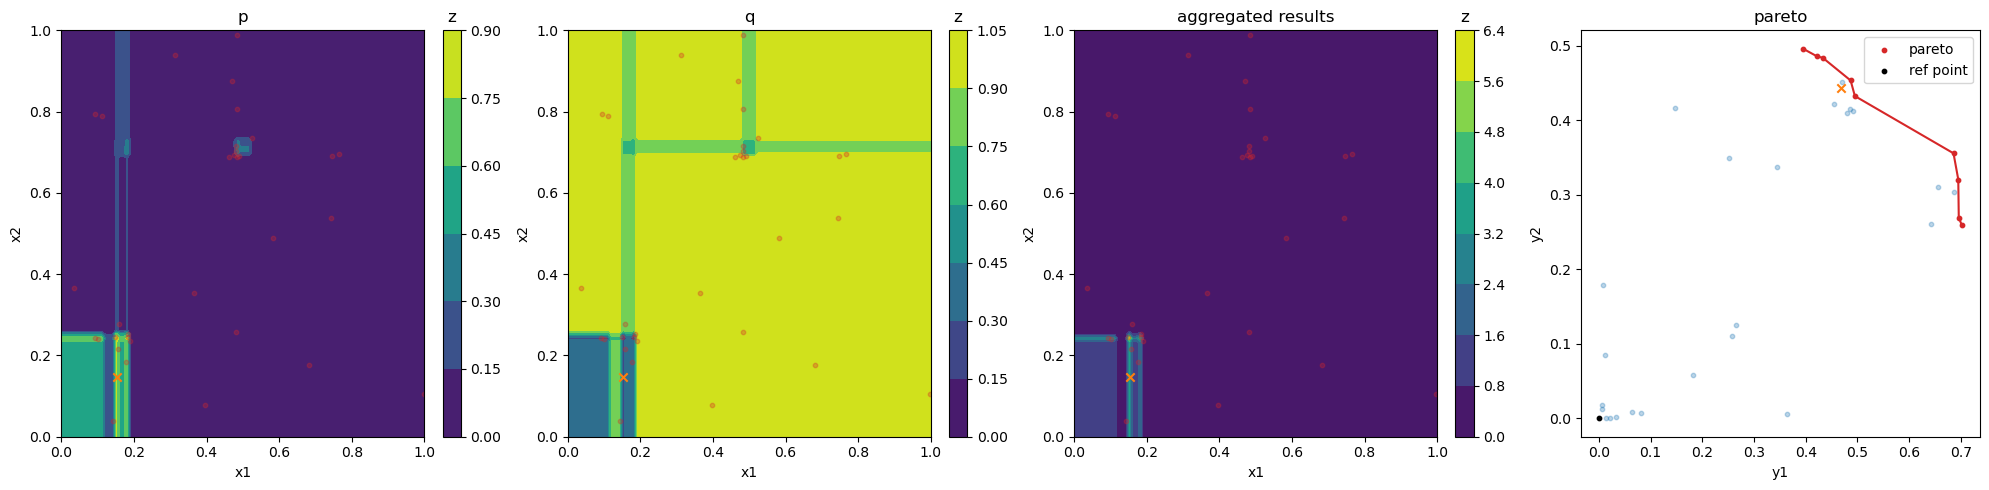

2024-05-07 10:04:05,712 | Model fitting takes 0.01s
2024-05-07 10:04:05,713 | Optimizing the acquisition function takes 0.00s


Iteration 28


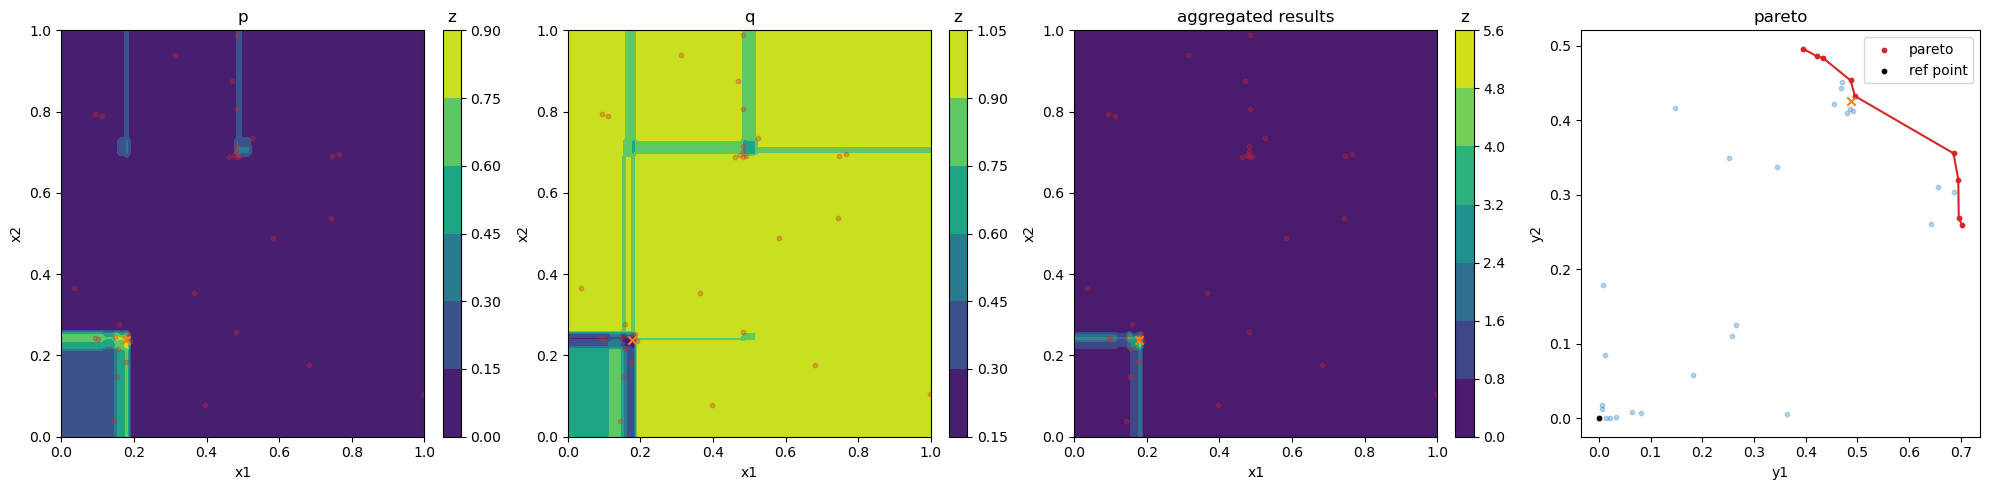

2024-05-07 10:04:06,380 | Model fitting takes 0.01s
2024-05-07 10:04:06,381 | Optimizing the acquisition function takes 0.00s


Iteration 29


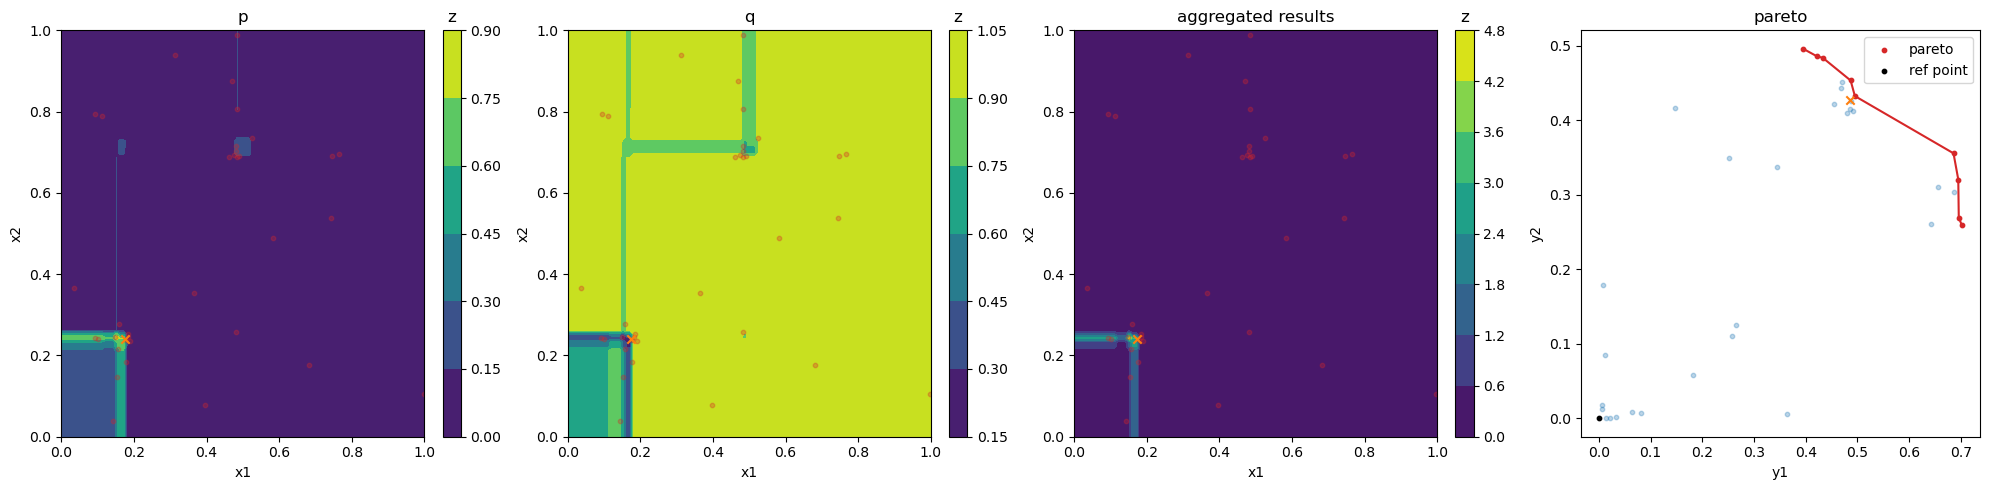

In [11]:
x_obs = init_x
y_obs = init_y
gamma = 1/3

optimizer = MBORE(
    problem=problem,
    gamma=gamma
)

for n in range(30):
    print(f"Iteration {n}")

    pareto = is_non_dominated(y_obs)
    bd = DominatedPartitioning(ref_point=problem.ref_point, Y=y_obs)
    nbd = FastNondominatedPartitioning(ref_point=problem.ref_point, Y=y_obs)
    u, l = bd.hypercell_bounds
    u_nbd, _ = nbd.hypercell_bounds

    boxes = [Rectangle(
        l_point.cpu(),
        *(u_point - l_point).cpu(),
    ) for l_point, u_point in zip(l, u)]

    new_x = optimizer.observe_and_suggest(x_obs, y_obs, gamma=gamma)
    new_y = problem(new_x)

    preds_p = torch.empty(0, **tkwargs)
    preds_q = torch.empty(0, **tkwargs)
    preds_m = torch.empty(0, **tkwargs)
    preds = torch.empty(0, **tkwargs)
    i = 0

    acf_mdre = optimizer.clf.clf.predict_proba(x_cands)
    dr_mdre = acf_mdre[:, 1] / np.clip(acf_mdre[:, 0], a_min=1e-10, a_max=None)
    preds = torch.cat([preds, torch.from_numpy(dr_mdre)])
    preds_p = torch.cat([preds_p, torch.from_numpy(acf_mdre[:, 1])])
    preds_q = torch.cat([preds_q, torch.from_numpy(acf_mdre[:, 0])])

    # plot aggregated results
    fig = plt.figure(figsize=(20, 5))

    ax_p = plt.subplot2grid((1, 4), (0, 0))
    plot_input_space(xx, yy, x_obs, preds_p, fig, ax_p, title="p")
    ax_p.scatter(*new_x.t(), marker='x', color='tab:orange', label='candidates')
    ax_q = plt.subplot2grid((1, 4), (0, 1))
    plot_input_space(xx, yy, x_obs, preds_q, fig, ax_q, title="q")
    ax_q.scatter(*new_x.t(), marker='x', color='tab:orange', label='candidates')

    ax_agg = plt.subplot2grid((1, 4), (0, 2))
    plot_input_space(xx, yy, x_obs, preds, fig, ax_agg, title="aggregated results")
    ax_agg.scatter(*new_x.t(), marker='x', color='tab:orange', label='candidates')

    ax_agg_p = plt.subplot2grid((1,  4), (0, 3))
    plot_pareto_space(y_obs, pareto, l, u_nbd, ax_agg_p, title='pareto')
    ax_agg_p.scatter(*new_y.t(), marker='x', color='tab:orange', label='candidates')
    plt.tight_layout()
    plt.show()
    x_obs = torch.cat([x_obs, new_x])
    y_obs = torch.cat([y_obs, new_y])